In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


정답은 :  0


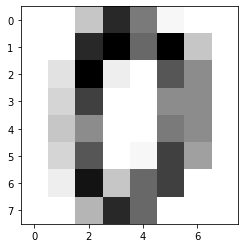

In [11]:
plt.imshow(digits.images[0], cmap = "Greys", interpolation="nearest")
print("정답은 : ", digits.target[0])

In [12]:
print(digits.images.shape)# 1797개의 sample과 8 * 8 행렬로 이루어져 있다.

(1797, 8, 8)


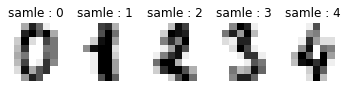

In [13]:
#상위 다섯개 sample을 시각화하기
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis("off")
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    plt.title("samle : %d" %label)

In [30]:
X = torch.FloatTensor(digits.data)
Y = torch.LongTensor(digits.target)

In [31]:
print(X.shape)
print(Y.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [32]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [33]:
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()
losses = []
nb_epochs = 1000

In [34]:
for epoch in range(nb_epochs + 1):
    hypothesis = model(X)
    loss = loss_fn(hypothesis, Y)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("epoch : ", epoch, "loss : ", loss)    

epoch :  0 loss :  tensor(2.6095, grad_fn=<NllLossBackward>)
epoch :  100 loss :  tensor(0.3102, grad_fn=<NllLossBackward>)
epoch :  200 loss :  tensor(0.0784, grad_fn=<NllLossBackward>)
epoch :  300 loss :  tensor(0.0342, grad_fn=<NllLossBackward>)
epoch :  400 loss :  tensor(0.0167, grad_fn=<NllLossBackward>)
epoch :  500 loss :  tensor(0.0093, grad_fn=<NllLossBackward>)
epoch :  600 loss :  tensor(0.0058, grad_fn=<NllLossBackward>)
epoch :  700 loss :  tensor(0.0040, grad_fn=<NllLossBackward>)
epoch :  800 loss :  tensor(0.0029, grad_fn=<NllLossBackward>)
epoch :  900 loss :  tensor(0.0022, grad_fn=<NllLossBackward>)
epoch :  1000 loss :  tensor(0.0017, grad_fn=<NllLossBackward>)


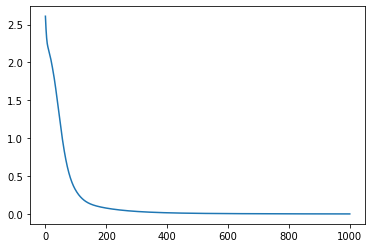

In [35]:
plt.plot(losses)